In [1]:
import pandas as pd

leg = pd.read_csv('data/legs/318ae5fe46ac6a4ed5e1ee55f5b53677.csv')

leg.columns

Index(['legId', 'searchDate', 'flightDate', 'startingAirport',
       'destinationAirport', 'fareBasisCode', 'travelDuration', 'elapsedDays',
       'isBasicEconomy', 'isRefundable', 'isNonStop', 'baseFare', 'totalFare',
       'seatsRemaining', 'totalTravelDistance',
       'segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw',
       'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw',
       'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode',
       'segmentsAirlineName', 'segmentsAirlineCode',
       'segmentsEquipmentDescription', 'segmentsDurationInSeconds',
       'segmentsDistance', 'segmentsCabinCode'],
      dtype='object')

In [2]:
# Add column days until flight
leg['days_until_flight'] = pd.to_datetime(leg['flightDate']) - pd.to_datetime(leg['searchDate'])

leg['days_until_flight'] = leg['days_until_flight'].dt.days



In [6]:
# Extract relevant features
df_model = leg[['days_until_flight', 'baseFare', 'seatsRemaining', 'totalFare']]

# Convert data types if necessary
df_model['days_until_flight'] = df_model['days_until_flight'].astype(int)
df_model['baseFare'] = df_model['baseFare'].astype(float)
df_model['seatsRemaining'] = df_model['seatsRemaining'].astype(int)

/var/folders/rn/2y5gd94x6nncdyyd6dbxhzcc0000gn/T/ipykernel_10107/3912019840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['days_until_flight'] = df_model['days_until_flight'].astype(int)
/var/folders/rn/2y5gd94x6nncdyyd6dbxhzcc0000gn/T/ipykernel_10107/3912019840.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['baseFare'] = df_model['baseFare'].astype(float)
/var/folders/rn/2y5gd94x6nncdyyd6dbxhzcc0000gn/T/ipykernel_10107/3912019840.py:7: SettingWithCopyWarning: 
A value is trying

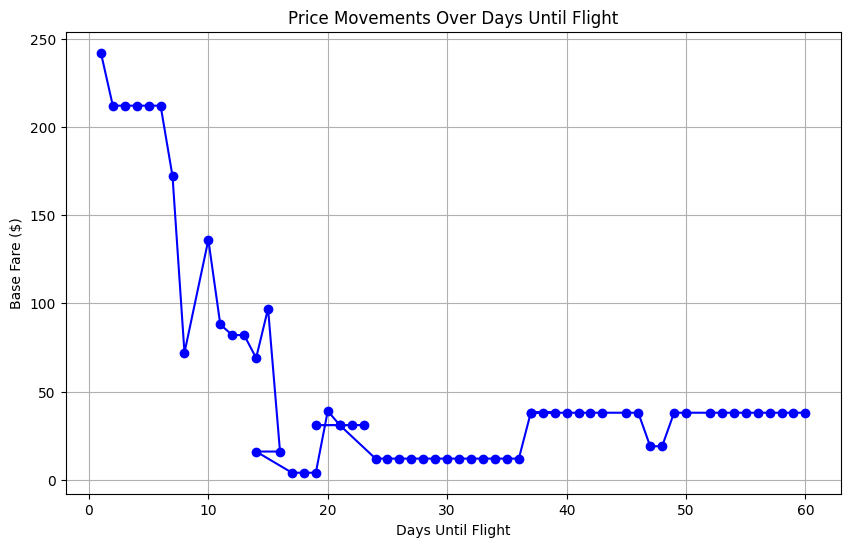

In [7]:
# Plot price movements
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df_model['days_until_flight'], df_model['baseFare'], marker='o', linestyle='-', color='b')
plt.title('Price Movements Over Days Until Flight')
plt.xlabel('Days Until Flight')
plt.ylabel('Base Fare ($)')
plt.grid(True)
plt.show()


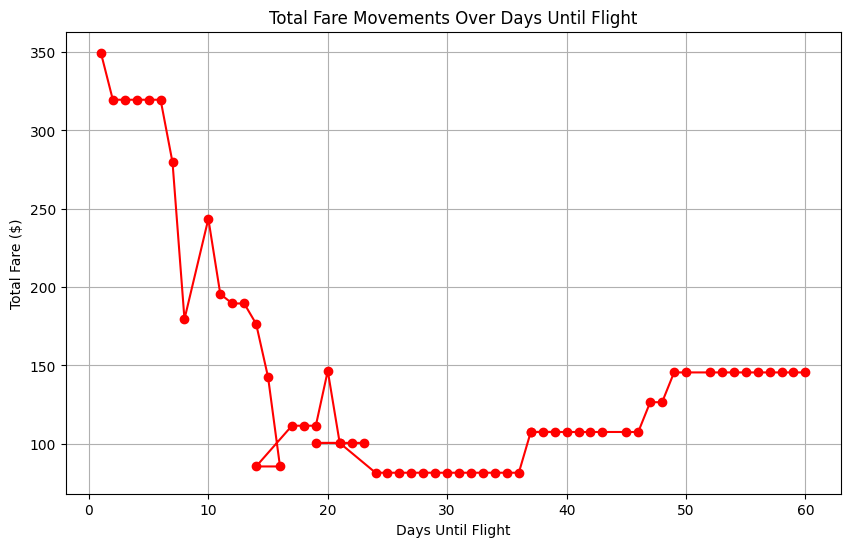

In [8]:
# Plot totalFare
plt.figure(figsize=(10, 6))
plt.plot(df_model['days_until_flight'], df_model['totalFare'], marker='o', linestyle='-', color='r')
plt.title('Total Fare Movements Over Days Until Flight')
plt.xlabel('Days Until Flight')
plt.ylabel('Total Fare ($)')
plt.grid(True)
plt.show()



In [9]:
grid_search = pd.read_csv('grid_search_results.csv')

In [16]:
grid_search['total_revenue'].max()

max_rev =grid_search[grid_search['total_revenue'] == grid_search['total_revenue'].max()]

max_rev

,g_B,d_B,h_B,a_B,b_B,g_E,d_E,h_E,a_E,b_E,total_revenue,total_sales_B,total_sales_E
52623,2.2,70,-0.1,0.1,0.005,5.0,170,-0.1,0.05,0.002,10206.634477,8.783770e-12,150.0


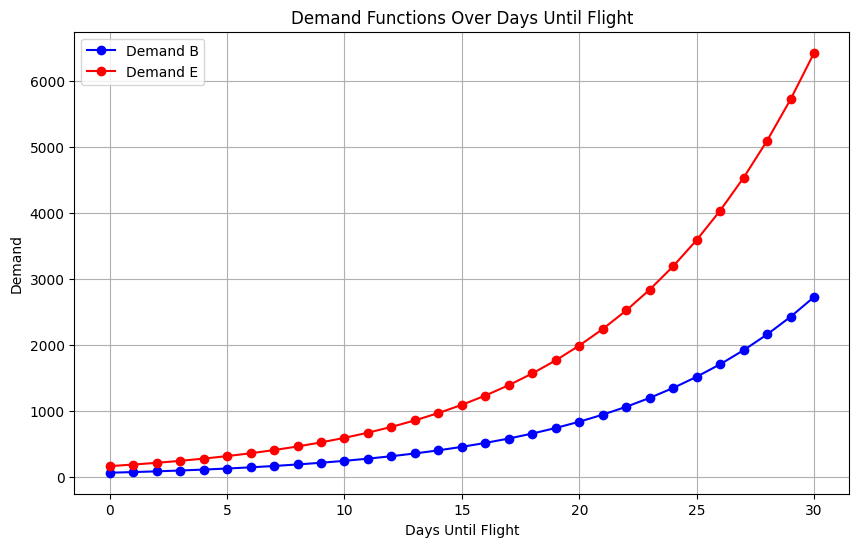

In [15]:
g_B = max_rev['g_B'].values[0]
d_B = max_rev['d_B'].values[0]
h_B = max_rev['h_B'].values[0]
a_B = max_rev['a_B'].values[0]
b_B = max_rev['b_B'].values[0]

g_E = max_rev['g_E'].values[0]
d_E = max_rev['d_E'].values[0]
h_E = max_rev['h_E'].values[0]
a_E = max_rev['a_E'].values[0]
b_E = max_rev['b_E'].values[0]

x_start = 30

import numpy as np

# Define demand functions
def demand_B(x):
    return (g_B * x + d_B) * np.exp(-h_B * x)

def demand_E(x):
    return (g_E * x + d_E) * np.exp(-h_E * x)

# Define probability functions
def probability_B(y, x):
    return np.exp(-y * (a_B + b_B * x))

def probability_E(y, x):
    return np.exp(-y * (a_E + b_E * x))


days = np.arange(x_start, -1, -1)  # Days before departure: 30, 29, ..., 0

# Plot demand functions
plt.figure(figsize=(10, 6))
plt.plot(days, demand_B(days), label='Demand B', marker='o', linestyle='-', color='b')
plt.plot(days, demand_E(days), label='Demand E', marker='o', linestyle='-', color='r')
plt.title('Demand Functions Over Days Until Flight')
plt.xlabel('Days Until Flight')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()

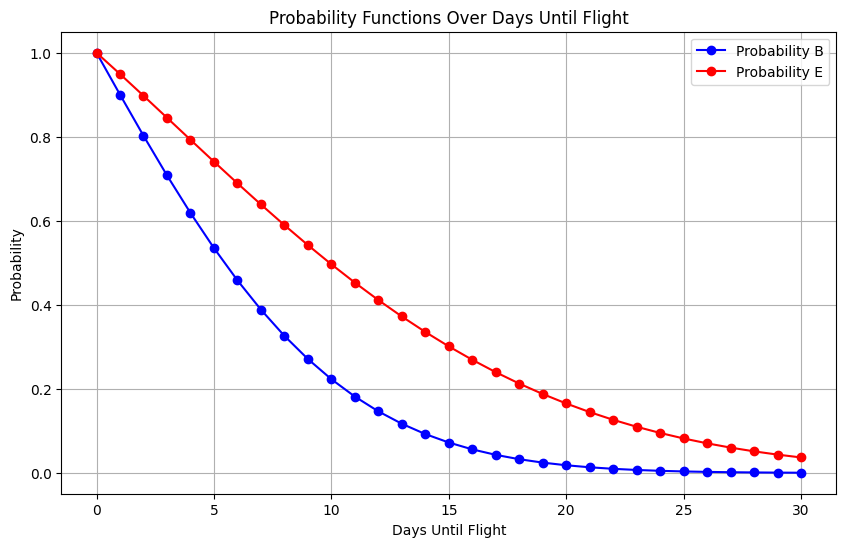

In [17]:
# plot probability functions
plt.figure(figsize=(10, 6))
plt.plot(days, probability_B(days, days), label='Probability B', marker='o', linestyle='-', color='b')
plt.plot(days, probability_E(days, days), label='Probability E', marker='o', linestyle='-', color='r')
plt.title('Probability Functions Over Days Until Flight')
plt.xlabel('Days Until Flight')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Plot total revenue
plt.figure(figsize=(10, 6))
plt.plot(days, total_revenue(days), label='Total Revenue', marker='o', linestyle='-', color='g')
plt.title('Total Revenue Over Days Until Flight')
plt.xlabel('Days Until Flight')
plt.ylabel('Total Revenue ($)')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'total_revenue' is not defined

<Figure size 1000x600 with 0 Axes>